In [ ]:
# DT ....


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as  np

In [12]:
cr = pd.read_csv(r"C:\Users\animesh\Documents\CreditRisk.csv")

In [4]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
cr.LoanAmount.value_counts()

120.0    29
110.0    27
100.0    24
187.0    21
150.0    19
         ..
196.0     1
400.0     1
250.0     1
500.0     1
156.0     1
Name: LoanAmount, Length: 232, dtype: int64

In [14]:
cr.Gender.fillna("Male", inplace = True)
cr.Married.fillna("No", inplace = True)
cr.Dependents .fillna(0, inplace = True)
cr.Self_Employed.fillna("No", inplace = True)
cr.LoanAmount.fillna(cr.LoanAmount.mean(), inplace = True)
cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean(), inplace = True)
cr.Credit_History.fillna(1, inplace = True)

In [15]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
# convert non numeric/categorical to numeric 

In [ ]:
#cr.Gender.replace({"Male" :0 , "Female" :1}, inplace = True )
#cr.Self_Employed.replace({"Yes" :1 , "No" :0}, inplace = True)
#cr.Education.replace({"Graduate" :1 , "Not Graduate" :0}, inplace = True)
#cr.Married.replace({"Yes":1 , "No" :0}, inplace = True )
#cr.Property_Area.replace({"Semiurban" :1 , "Urban" :2  , "Rural" :0}, inplace = True)
#cr.Loan_Status.replace({"Y" :1 , "N" :0}, inplace = True)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
cr[cr.select_dtypes(include = ['object']).columns] = cr[cr.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [19]:
cr.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,0,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,0,0


In [19]:
cr.shape

(981, 13)

In [20]:
cr_x = cr.iloc[: , 1:12]
cr_y = cr.iloc[: , 12]

In [26]:
cr_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2
1,0,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,0
2,0,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2
3,0,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2
4,0,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2


In [25]:
cr_x.shape

(981, 11)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
cr_x_train, cr_x_test, cr_y_train, cr_y_test = train_test_split(cr_x, cr_y, test_size = 0.2)

In [23]:
print(cr_x_train.shape)
print(cr_y_train.shape)
print("-----")
print(cr_x_test.shape)
print(cr_y_test.shape)

(784, 11)
(784,)
-----
(197, 11)
(197,)


In [28]:
cr_x_train.shape

(784, 11)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier(criterion =  "gini", max_depth = 4, min_samples_split = 30)

In [26]:
dt.fit(cr_x_train, cr_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
pred_val = dt.predict(cr_x_test)

In [38]:
from sklearn.metrics import confusion_matrix 

In [40]:
tab1 = confusion_matrix(pred_val, cr_y_test)
tab1

array([[ 34,   3],
       [ 22, 138]], dtype=int64)

In [41]:
tab1.diagonal().sum()/tab1.sum()*100

87.30964467005076

In [44]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05297825, 0.01966991, 0.01327014, 0.        , 0.88588144,
       0.02820025])

In [45]:
dt.feature_importances_.sum()

0.9999999999999999

In [46]:
cr_x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [47]:
feat_importances = pd.DataFrame({"Feature": cr_x_train.columns , "Importances": dt.feature_importances_})

In [49]:
feat_importances.sort_values("Importances", ascending = False)

,Feature,Importances
9,Credit_History,0.885881
5,ApplicantIncome,0.052978
10,Property_Area,0.028200
6,CoapplicantIncome,0.019670
7,LoanAmount,0.013270
0,Gender,0.000000
1,Married,0.000000
2,Dependents,0.000000
3,Education,0.000000
4,Self_Employed,0.000000


In [51]:
#!pip install stringIO

In [52]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [1]:
conda install -c anaconda graphviz=2.38.0


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
from io import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import pydot
import matplotlib.pyplot as plt


In [3]:
dot_data = StringIO()

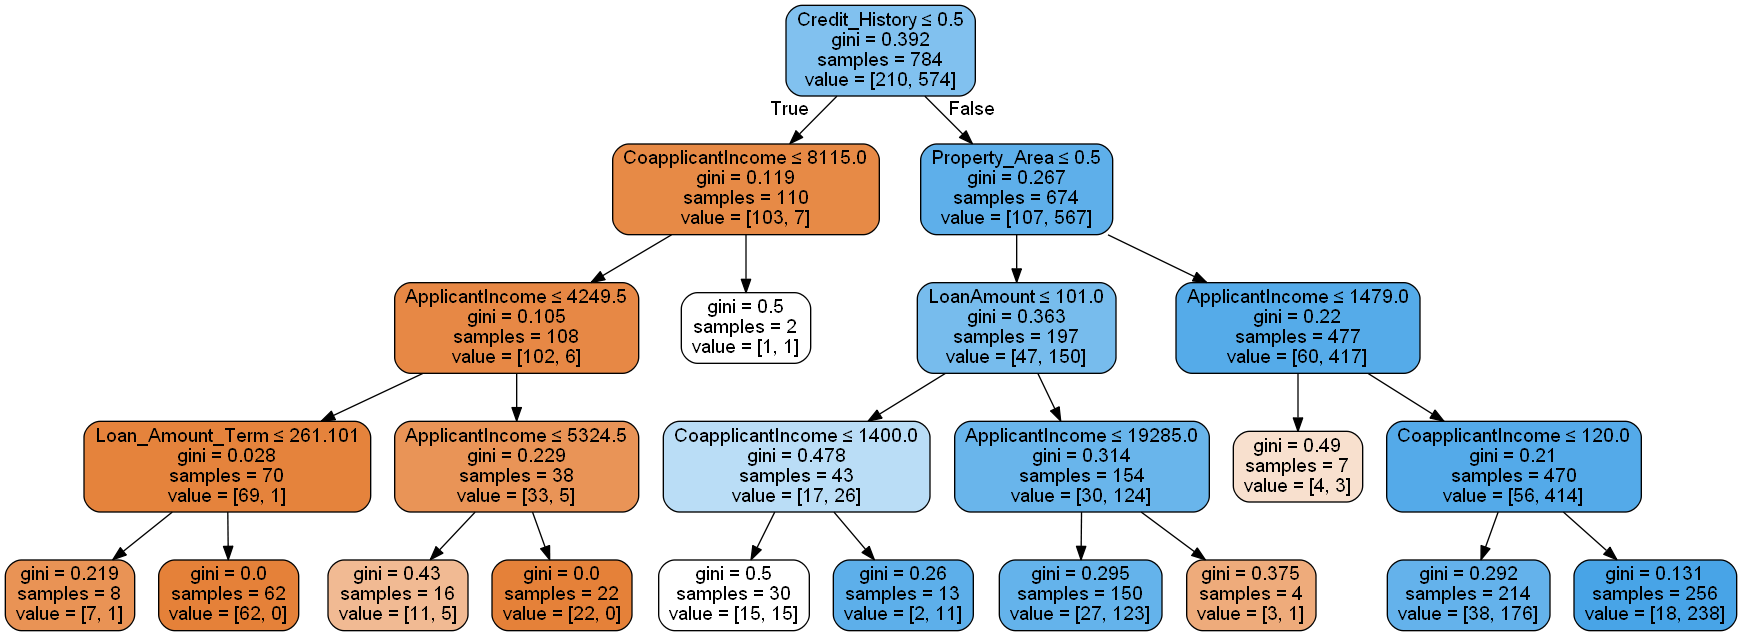

In [29]:
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names = list(cr_x_train.columns))
#matplotlib inline
#plt.show()
#%matplotlib inline


graph  = pydotplus.graph_from_dot_data(dot_data.getvalue())
(graph,)  = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [30]:
# random forest ......

from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(cr_x_train, cr_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
pred_rf =  rf.predict(cr_x_test)

In [34]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred_rf, cr_y_test)
tab1

array([[ 40,   2],
       [ 19, 136]], dtype=int64)

In [35]:
tab1.diagonal().sum() / tab1.sum() * 100

89.34010152284264

In [36]:
rf.feature_importances_

array([0.01812985, 0.02274692, 0.04230405, 0.02000892, 0.01510467,
       0.20025451, 0.08903766, 0.17616372, 0.03305294, 0.33811178,
       0.04508499])

In [37]:
cr_x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [38]:
# create a rf with feature importance 

feat_importances = pd.DataFrame({"Feature": cr_x_train.columns, "importances" : rf.feature_importances_})
feat_importances.sort_values("importances", ascending = False)

,Feature,importances
9,Credit_History,0.338112
5,ApplicantIncome,0.200255
7,LoanAmount,0.176164
6,CoapplicantIncome,0.089038
10,Property_Area,0.045085
2,Dependents,0.042304
8,Loan_Amount_Term,0.033053
1,Married,0.022747
3,Education,0.020009
0,Gender,0.018130


In [43]:
#knn  .................................
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier ()

In [44]:
knn.fit(cr_x_train, cr_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
pred_knn = knn.predict(cr_x_test)

In [46]:
knn_tab1 = confusion_matrix(pred_knn, cr_y_test)
knn_tab1 

array([[  7,  11],
       [ 52, 127]], dtype=int64)

In [47]:
knn_tab1.diagonal().sum()/knn_tab1.sum()

0.6802030456852792

In [54]:
# svm ....
from sklearn.svm import SVC

In [61]:
svc = SVC()

In [62]:
svc.fit(cr_x_train, cr_y_train)
pred_svc = svc.predict(cr_x_test)

tab1_svc =  confusion_matrix(pred_svc, cr_y_test)
tab1_svc

array([[  0,   0],
       [ 59, 138]], dtype=int64)

In [64]:
tab1_svc.diagonal().sum()/tab1_svc.sum()

0.700507614213198

In [65]:
# boosting algorithm ..........

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [67]:
dt= DecisionTreeClassifier()
abc = AdaBoostClassifier(dt, n_estimators = 50)

In [68]:
abc.fit(cr_x_train, cr_y_train)
pred_boost = abc.predict(cr_x_test)

tab1_boost =  confusion_matrix(pred_boost, cr_y_test)
tab1_boost

array([[ 40,  15],
       [ 19, 123]], dtype=int64)

In [69]:
tab1_boost.diagonal().sum()/tab1_boost.sum()

0.8274111675126904

In [70]:
#  cross validation 

from sklearn.model_selection import cross_val_score

In [72]:
cross_score = cross_val_score(dt, cr_x_train, cr_y_train, cv = 7, scoring = "accuracy")

In [73]:
cross_score.mean()

0.7908163265306124

In [74]:
cross_score.min()

0.7410714285714286

In [75]:
cross_score.max()

0.8392857142857143

In [76]:
cross_score

array([0.8125    , 0.83928571, 0.75892857, 0.8125    , 0.74107143,
       0.80357143, 0.76785714])

In [ ]:
# nlp ............

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as  np
import nltk  # natural language tool kits 
import sklearn 

In [3]:
messages = pd.read_csv(r"C:\Users\animesh\Documents\spam.csv", encoding = 'cp1252')

In [4]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
messages.shape

(6776, 5)

In [6]:
messages = messages.iloc[: , [0, 1] ] 

In [7]:
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.rename(columns = {"v1": "label" , "v2" : "text"}, inplace = True)

In [9]:
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.label.replace({"ham" : 0 , "spam" : 1}, inplace = True)

In [11]:
messages.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# data cleaning and data conversion part has been done  

In [12]:
messages.text

# whenever we are working with nlp , alwayes convert your data either into lower case and upper case . 

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
6771    This is the 2nd time we have tried 2 contact u...
6772                Will Ì_ b going to esplanade fr home?
6773    Pity, * was in mood for that. So...any other s...
6774    The guy did some bitching but I acted like i'd...
6775                           Rofl. Its true to its name
Name: text, Length: 6776, dtype: object

In [13]:
messages.text = messages.text.str.lower()
# To convert into lower case .

In [14]:
messages.text # all data are the lower in case . 

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
6771    this is the 2nd time we have tried 2 contact u...
6772                will ì_ b going to esplanade fr home?
6773    pity, * was in mood for that. so...any other s...
6774    the guy did some bitching but i acted like i'd...
6775                           rofl. its true to its name
Name: text, Length: 6776, dtype: object

In [15]:
from nltk.corpus import stopwords

In [16]:
stopwords.words("English")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
len(stopwords.words("english"))

179

In [18]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def text_process(mess) : 
    """
    1) Remove the punctuation
    2) Remove the stopwords
    3) return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split()if word not in stopwords.words("english")]

In [20]:
abc = "this is just an example "
abc

'this is just an example '

In [21]:
abc.split()

['this', 'is', 'just', 'an', 'example']

In [22]:
messages['text'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: text, Length: 6776, dtype: object

In [23]:
from sklearn.feature_extraction.text import CountVectorizer # to count each an every word 

In [24]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['text'])

In [25]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [26]:
len(bow_transformer.vocabulary_)

9422

In [28]:
messages_bow = bow_transformer.transform(messages.text) # convert the tdm 

In [29]:
messages_bow.shape # every thing is in number . 

(6776, 9422)

In [31]:
type(messages_bow)

scipy.sparse.csr.csr_matrix

In [32]:
from sklearn.model_selection import train_test_split 

In [33]:
x_train, x_test , y_train, y_test = train_test_split (messages_bow , messages.label, test_size = .2)

In [34]:
print(x_train.shape)
print(y_train.shape)
print("--------")
print(x_test.shape)
print(y_test.shape)

(5420, 9422)
(5420,)
--------
(1356, 9422)
(1356,)


In [35]:
from sklearn.ensemble import RandomForestClassifier # we another model use DT , naive bayes 

In [36]:
rf = RandomForestClassifier()

In [37]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
pred = rf.predict(x_test)

In [39]:
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
tab1 = confusion_matrix(pred , y_test)

In [42]:
tab1

array([[1191,   27],
       [   2,  136]], dtype=int64)

In [44]:
tab1.diagonal().sum() / tab1.sum()*100  # seems to be extremlly good model .

97.86135693215338

In [ ]:
# naive bayes ...........increses a conditional probablity lets say that email is a spam email . 
# word cloud ............pictorial represents of most frequent words 

In [47]:
from wordcloud import WordCloud

In [46]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


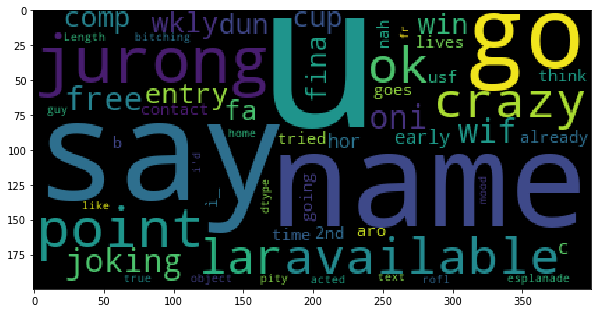

In [50]:
cloud = WordCloud(stopwords = stopwords.words("English"), max_words = 58 ).generate(str(messages['text']))
plt.figure(figsize = (10 , 10 ))
plt.imshow(cloud)

In [51]:
amazon = pd.read_csv(r"C:\Users\animesh\Documents\amazonreviews.tsv", sep = "\t")

In [52]:
amazon.head() # to predict the negative and possitive sentimate

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [57]:
amazon.label.value_counts() # take as a label column is a target variables 

neg    5097
pos    4903
Name: label, dtype: int64

In [58]:
amazon.label.replace({"neg" : 0 , "pos" : 1}, inplace = True)

In [59]:
amazon.head()

,label,review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."


In [60]:
amazon.label.value_counts()

0    5097
1    4903
Name: label, dtype: int64

In [63]:
amazon.review

0       Stuning even for the non-gamer: This sound tra...
1       The best soundtrack ever to anything.: I'm rea...
2       Amazing!: This soundtrack is my favorite music...
3       Excellent Soundtrack: I truly like this soundt...
4       Remember, Pull Your Jaw Off The Floor After He...
                              ...                        
9995    A revelation of life in small town America in ...
9996    Great biography of a very interesting journali...
9997    Interesting Subject; Poor Presentation: You'd ...
9998    Don't buy: The box looked used and it is obvio...
9999    Beautiful Pen and Fast Delivery.: The pen was ...
Name: review, Length: 10000, dtype: object

In [66]:
amazon.review = amazon.review.str.lower() # convert in lower case 

In [67]:
amazon.review

0       stuning even for the non-gamer: this sound tra...
1       the best soundtrack ever to anything.: i'm rea...
2       amazing!: this soundtrack is my favorite music...
3       excellent soundtrack: i truly like this soundt...
4       remember, pull your jaw off the floor after he...
                              ...                        
9995    a revelation of life in small town america in ...
9996    great biography of a very interesting journali...
9997    interesting subject; poor presentation: you'd ...
9998    don't buy: the box looked used and it is obvio...
9999    beautiful pen and fast delivery.: the pen was ...
Name: review, Length: 10000, dtype: object

In [68]:
from nltk.corpus import stopwords

In [69]:
stopwords.words("English")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [70]:
len(stopwords.words("english"))

179

In [71]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [72]:
def text_process(mess) : 
    """
    1) Remove the punctuation
    2) Remove the stopwords
    3) return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split()if word not in stopwords.words("english")]

In [73]:
abc = "this is just an example "
abc

'this is just an example '

In [74]:
abc.split()

['this', 'is', 'just', 'an', 'example']

In [75]:
amazon['review'].apply(text_process)

0       [stuning, even, nongamer, sound, track, beauti...
1       [best, soundtrack, ever, anything, im, reading...
2       [amazing, soundtrack, favorite, music, time, h...
3       [excellent, soundtrack, truly, like, soundtrac...
4       [remember, pull, jaw, floor, hearing, youve, p...
                              ...                        
9995    [revelation, life, small, town, america, early...
9996    [great, biography, interesting, journalist, bi...
9997    [interesting, subject, poor, presentation, you...
9998    [dont, buy, box, looked, used, obviously, new,...
9999    [beautiful, pen, fast, delivery, pen, shipped,...
Name: review, Length: 10000, dtype: object

In [76]:
from sklearn.feature_extraction.text import CountVectorizer # to count each an every word 

In [77]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(amazon['review'])

In [78]:
bow_transformer.vocabulary_

{'stuning': 34189,
 'even': 12595,
 'nongamer': 24278,
 'sound': 33125,
 'track': 36325,
 'beautiful': 3941,
 'paints': 25720,
 'senery': 31523,
 'mind': 22665,
 'well': 38818,
 'would': 39538,
 'recomend': 29102,
 'people': 26193,
 'hate': 16497,
 'vid': 38116,
 'game': 14941,
 'music': 23568,
 'played': 26823,
 'chrono': 6964,
 'cross': 8903,
 'games': 14971,
 'ever': 12608,
 'best': 4239,
 'backs': 3531,
 'away': 3391,
 'crude': 8936,
 'keyboarding': 19746,
 'takes': 34897,
 'fresher': 14581,
 'step': 33794,
 'grate': 15807,
 'guitars': 16080,
 'soulful': 33109,
 'orchestras': 25171,
 'impress': 17969,
 'anyone': 2530,
 'cares': 6094,
 'listen': 20917,
 'soundtrack': 33147,
 'anything': 2538,
 'im': 17820,
 'reading': 28886,
 'lot': 21215,
 'reviews': 30044,
 'saying': 30943,
 'figured': 13711,
 'id': 17672,
 'write': 39594,
 'review': 30033,
 'disagree': 10372,
 'bit': 4457,
 'opinino': 25096,
 'yasunori': 39747,
 'mitsudas': 22881,
 'ultimate': 37007,
 'masterpiece': 21946,
 'time

In [79]:
len(bow_transformer.vocabulary_)

40040

In [80]:
amazon_bow = bow_transformer.transform(amazon.review) # convert the tdm 

In [81]:
amazon_bow.shape

(10000, 40040)

In [82]:
type(amazon_bow)

scipy.sparse.csr.csr_matrix

In [83]:
from sklearn.model_selection import train_test_split 

In [84]:
x_train, x_test , y_train, y_test = train_test_split (messages_bow , messages.label, test_size = .2)

In [85]:
print(x_train.shape)
print(y_train.shape)
print("--------")
print(x_test.shape)
print(y_test.shape)

(5420, 9422)
(5420,)
--------
(1356, 9422)
(1356,)


In [86]:
from sklearn.ensemble import RandomForestClassifier # we another model use DT , naive bayes 

In [87]:
rf = RandomForestClassifier()


In [88]:
rf.fit(x_train, y_train)


RandomForestClassifier()

In [89]:
pred = rf.predict(x_test)
pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
tab1 = confusion_matrix(pred, y_test)

In [92]:
tab1

array([[1180,   28],
       [   0,  148]], dtype=int64)

In [93]:
tab1.diagonal().sum() / tab1.sum()  # seems to be extremlly good model .

0.9793510324483776

In [94]:
from wordcloud import WordCloud

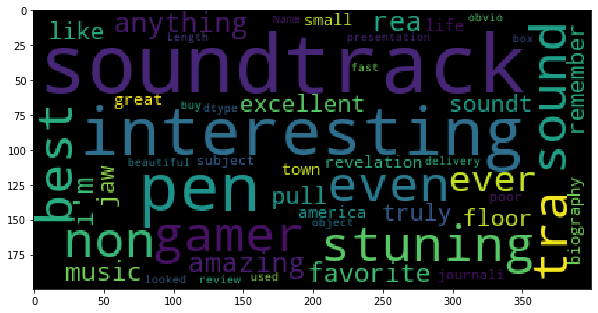

In [95]:
cloud = WordCloud(stopwords = stopwords.words("English"), max_words = 58 ).generate(str(amazon['review']))
plt.figure(figsize = (10 , 10 ))
plt.imshow(cloud)